<div style="text-align: right"> 17.01.2020</div>

***Name:*** 

# Hausaufgabe Blatt 11

## Barometrische Höhenformel: Revisited

Wir wollen erneut die barometrische Höhenformel betrachten. Wie Sie bereits wissen, stellt diese einen Bezug zwischen dem Druck $p$ eines idealen Gases der molekularen Masse $m$ abhängig von der Höhe über dem Boden $z$ im Schwerefeld der Erde her. Bisher haben wir die Temperatur $T$ als konstant betrachtet. In der realen Erdatmosphäre ändert sich die Temperatur aber in Abhängigkeit von der Höhe. Dies hat einen Einfluss auf die Druckabhängigkeit.

Für ca. die ersten 20000 Höhenmeter kann man annehmen, dass die Temperatur alle 1000 m um ca. 6.5 Kelvin abnimmt. 

In der Änderung des Druck $\mathrm d p$, geht die höhenabhängende Temperatur $T\!\left(z\right)$ wie folgt ein:

$$ 
 \mathrm{d} p  = - \frac{mp}{k_B T\!\left(z\right)} g \,\mathrm{d}z.
 \tag{1}
$$
Dabei ist $m$ die molekulare Masse des Gases.

Daher wollen wir erneut den Druckverlauf berechnen, indem wir Gleichung (1) numerisch integrieren. Die nach dem Euler Verfahren diskretisierte Gleichung nimmt folgende Form an:
$$
 \Delta p  = - \frac{mp}{k_B T\!\left(z\right)} g \,\Delta z.
$$

Somit gilt für den Gesamtdruck in der Höhe $z + \Delta z$:

$$
p\left(z + \Delta z\right) = p\left(z\right) + \Delta p.
\tag{2}
$$

## Aufgabe 1

**a)** Schreiben Sie eine Funktion, die Ihnen die Temperatur in Abhängigkeit der Höhe berechnet. Führen Sie dabei ein, dass die Temperatur linear abnimmt. Wählen Sie die Steigung so, dass obige Annahme erfüllt ist. Nehmen Sie weiterhin an, dass die Temperatur direkt über dem Boden $T_0=292$ beträgt.

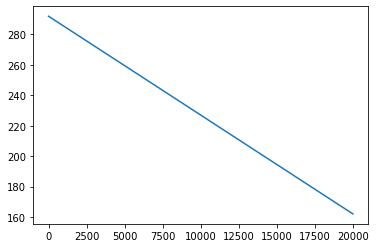

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

T0 = 292
delta = 6.5/1000
def temp(h):
    return T0 - delta*h
    
h = np.arange(0,20000,1)

plt.plot(h,temp(h))




**b)** Berechnen Sie nun den Druck in Abhängigkeit der Höhe indem Sie Gleichung (2) numerisch iterativ lösen für $dz = 1$ bis Sie eine Höhe $h = 10000$ über dem Boden erreicht haben. Gehen Sie dabei von folgenden Werten aus $p_0 = 1$, $m=4.8\cdot 10^{-3}$ und $g=9.81$.
Nehmen Sie dabei an, dass die Temperatur linear abfällt. Benutzen Sie dabei die in **a)** erstellte Funktion. Wählen Sie für $k_B=1.38$.

Plotten Sie den Druckverlauf mit konstanter und mit linear abnehmender Temperatur. Wählen Sie geeignete Beschriftungen für die Legende. 

[1.         0.99988314 0.9997663  ... 0.26670449 0.2666644  0.26662432]


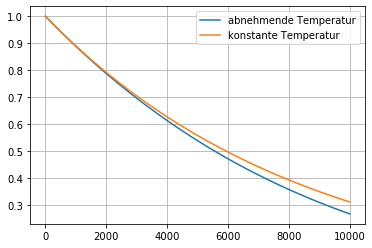

In [13]:
dz = 1
h = 10000
p0 = 1
m = 0.0048
g = 9.81
kB = 1.38
T = 292
p = 1
pz = np.array([p])
for i in range (0,h):
    p=p-(m*p)/(kB*temp(i))*g*dz
    pz=np.append(pz,p)
    
print(pz)

z=np.arange(0,10001,1)

def press(z):
    return p0*np.exp((-m*g)/(kB*T)*z)


plt.figure()
plt.plot(z,pz,label = "abnehmende Temperatur")
plt.plot(z,press(z),label = "konstante Temperatur")
plt.legend(loc = "upper right")
plt.grid()